# HR Analytics 

### Problem Statement:
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

- They first identify a set of employees based on recommendations/ past performance
- Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
- At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

<!-- ![wns_hack_im_1.jpg](attachment:wns_hack_im_1.jpg) -->

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("dataset/train_data.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


### Exploratory Data Analysis

In [6]:
df.shape

(54808, 14)

In [7]:
df.isnull().mean()*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'object']
numerical_features

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

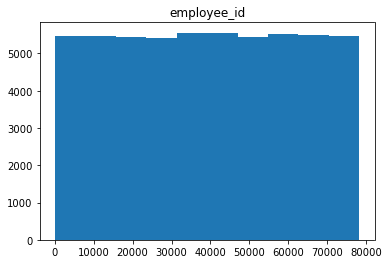

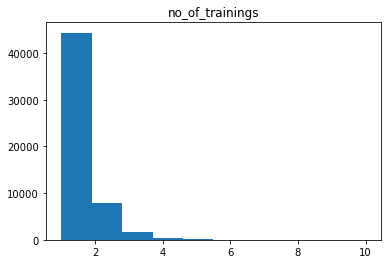

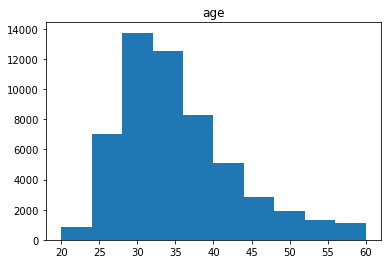

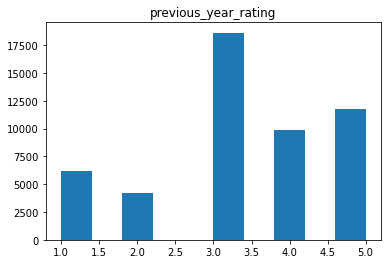

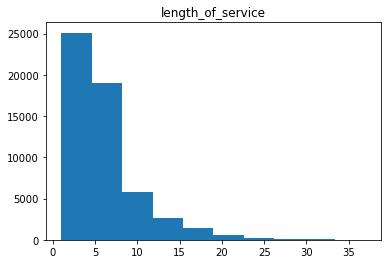

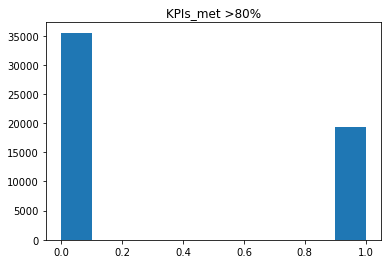

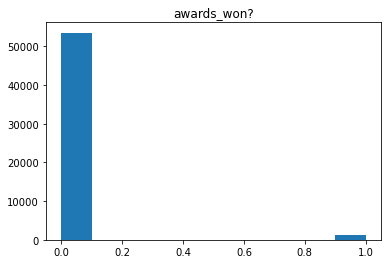

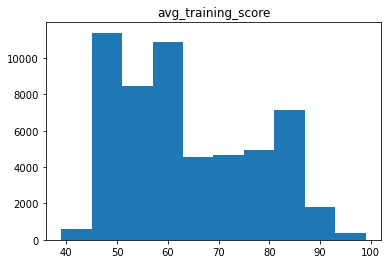

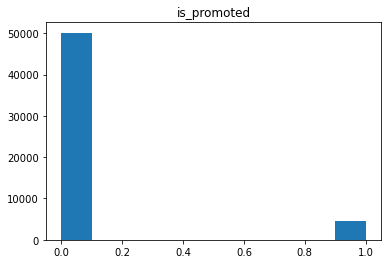

In [9]:
for feature in numerical_features:
    plt.hist(df[feature])
    plt.title(feature)
    plt.show()

#### The distribution of several features are guassian distribution and looks like log normal distribution

In [10]:
catogorical_features = [feature for feature in df.columns if df[feature].dtypes == 'object']
catogorical_features

['department', 'region', 'education', 'gender', 'recruitment_channel']

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

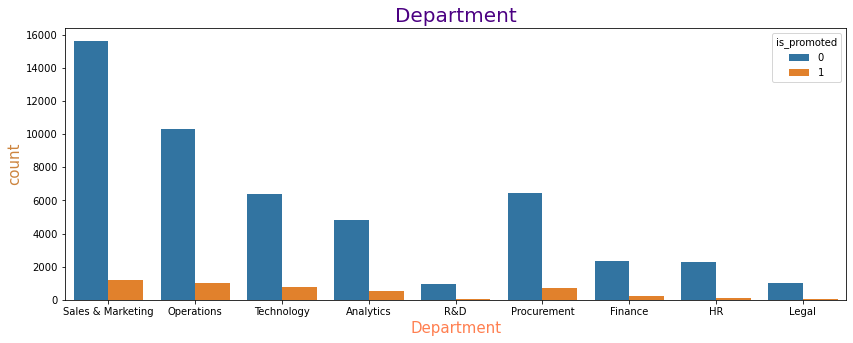

In [11]:
plt.figure(figsize=(14,5))
sns.countplot(df['department'], data=df, hue = 'is_promoted')
plt.title('Department', size = 20, color = 'indigo')
plt.xlabel('Department', size = 15, color = 'coral')
plt.ylabel('count', size=15, color = 'peru')
plt.show

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

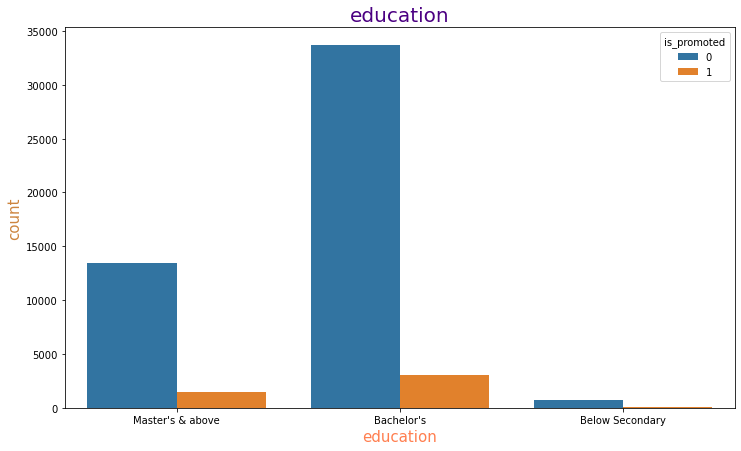

In [12]:
plt.figure(figsize=(12,7))
sns.countplot(df['education'], data=df, hue = 'is_promoted')
plt.title('education', size = 20, color = 'indigo')
plt.xlabel('education', size = 15, color = 'coral')
plt.ylabel('count', size=15, color = 'peru')
plt.show

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

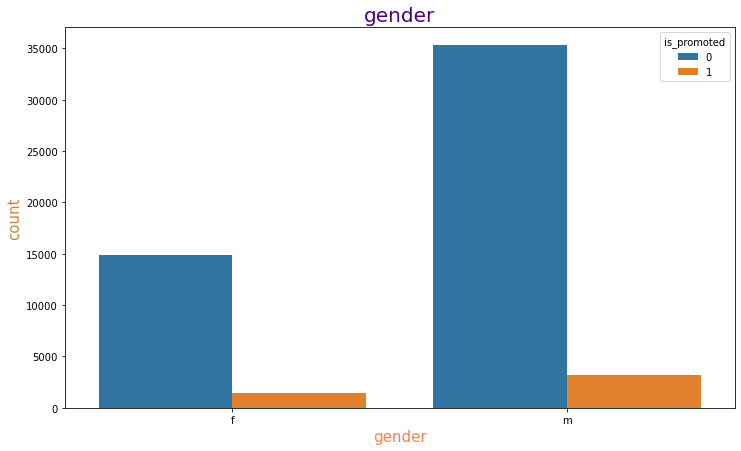

In [13]:
plt.figure(figsize=(12,7))
sns.countplot(df['gender'], data=df, hue = 'is_promoted')
plt.title('gender', size = 20, color = 'indigo')
plt.xlabel('gender', size = 15, color = 'coral')
plt.ylabel('count', size=15, color = 'peru')
plt.show

In [14]:
for feature in catogorical_features:
    print('-->', df[feature].value_counts())

--> Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
--> region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64
--> Bachelor's          36669
Master's & abov

In [15]:
for feature in df.columns:
    print(feature,"--->",len(df[feature].unique()))

employee_id ---> 54808
department ---> 9
region ---> 34
education ---> 4
gender ---> 2
recruitment_channel ---> 3
no_of_trainings ---> 10
age ---> 41
previous_year_rating ---> 6
length_of_service ---> 35
KPIs_met >80% ---> 2
awards_won? ---> 2
avg_training_score ---> 61
is_promoted ---> 2


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


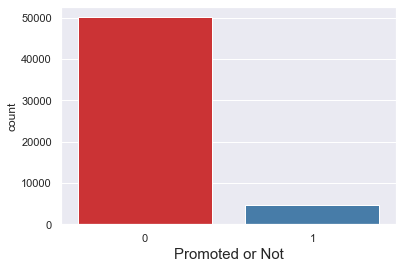

In [16]:
sns.set_theme(style="darkgrid")
sns.countplot(df['is_promoted'], palette='Set1')
plt.xlabel('Promoted or Not', size = 15)
plt.show()

##### Seems the dataset is imbalanced.We will fix it later

In [17]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [18]:
def box_plot(df, feature):
    sns.boxplot(df[feature])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


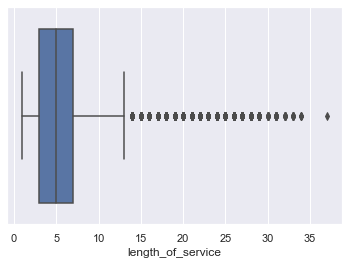

In [19]:
box_plot(df, 'length_of_service')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


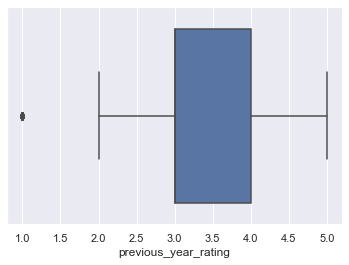

In [20]:
box_plot(df, 'previous_year_rating')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


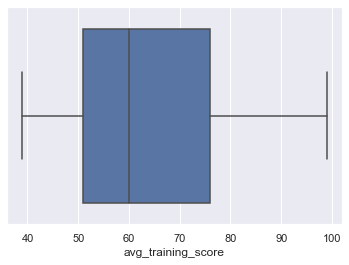

In [21]:
box_plot(df, 'avg_training_score')

<AxesSubplot:>

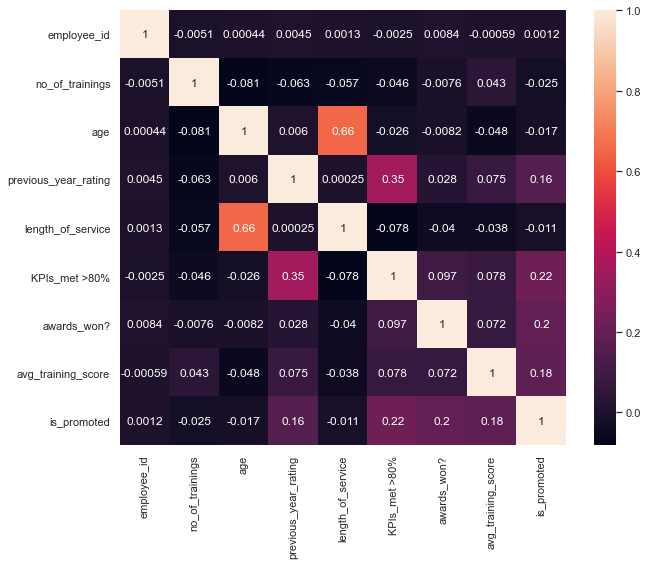

In [22]:
corrmat = df.corr()
figure = plt.figure(figsize=(10,8))
corr = sns.heatmap(corrmat, annot=True)
corr

### Conclusions:
- This dataset contains some missing values in the education and previous year rating which is needed to be handled.
- This dataset is an imbalanced dataset which is needed to handled.
- Some categorical features are needed to be encoded.
- The people who have done bachelors or masters are more likely to get promoted when comparing their education with the protion details.
- ALso the people who are all belong to the HR, R&D are less likel to get promoted.